# **Puppy Palooza**
Image Classifier using Fastai Library https://docs.fast.ai/

Using Google Collab: 

In order to run deep learning models you need GPU computers, which can be quite expensive for most people. The best way to do work is to use Google Collab. Which anyone can use!

Steps to Run:
1. Upload your code script 
2. Click Runtime
3. Change Runtime Type
4. Select GPU
5. Run your code







# The Project
The project is centered around image classification and the ability to use deep learning to acheive it. 

Today, more things are going virtual and are on phones, computers, tablets, etc very easily but some things are just better real. An extremely popular subject for entertainment of many people in real life is animals, but not ever animal can be 'Man's Best Friend'. Obviously, dogs love the ladies too! 

Choosing a dog is very touchy subject for some as breeding can make dogs cost in the thousands, but with the help of your local ASPCA, adopting your new Good Boy/Girl is just a short drive away.

So, how can I tell what kind of dog I have after I adopt one without going to the vet for blood work?

Easy! Use my Puppy Palooza App. I have created an app with the help of Deep Learning to achieve 90%+ accuracy across the top ~30 breeds found today using the American Kenel Club. 

Using Fastai, Google Collab, Bing Search API, & Endless Furr Balls.
You can see what kind of breed your current dog is, a potential addition to the family, or simple curiosity. Remember it only kills cats!

# Installing Packages

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 194kB 10.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.0MB 12.3MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 40kB 6.8MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 2.6MB 21.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

# Creating Image Folder

I will need an image folder to save all results for later

In [3]:
import os
os.mkdir('images')

# Using Bing API Key 
In order to download enough images to properly create an image classifer, you will either need a lot of personal photos or simple create and use the Bing API Key so that you can download 150 images for data testing

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '1a9d5beb31f94169bdbc3f734b6dac40')

Fastai has a search_images_bing function which you can see here

In [5]:
search_images_bing

<function fastbook.search_images_bing>

Bing returns max 150 results per search item. In this case 150 golden retrievers!

In [6]:
results = search_images_bing(key, 'Golden Retriever')
ims = results.attrgot('content_url')
len(ims)

150

# Loading image without Bing

Displaying images in Jupyter Notebook, or in other python environments are an amazing way to interact with your data. However, most of time you can only upload a singular image like below but with Fastai & Google Collab you can render hundreds of images and build image classification models quickly

In [7]:
ims = ['https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg']

In [8]:
dest = 'images/dog.jpg'
download_url(ims[0], dest)

## Golden Retriever Image

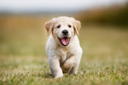

In [9]:
im = Image.open(dest)
im.to_thumb(128, 128)

# Dog Classification 

I have included 30+ of the most popular dogs that people own in order to build a model that can properly classify your little buddles of joy!


In [10]:
dog_types = 'Labrador Retriever', 'German Shepard', 'Golden Retriever', 'Pug', 'Bulldog', 'Poodle', 'Chihuahua', 'French Bulldog', 'Shih Tzu', 'Boxer', 'Pomeranian', 'Siberian Husky', 'Beagle', 'Maltese', 'Rottweiler', 'Dachshund', 'Yorkshire Terrier', 'American Pit Bull Terrier', 'Border Collie', 'Dobermann', 'Australian Shepard', 'Great Dane', 'St. Bernard', 'Cocker Spaniel', 'Bernese Mountain Dog', 'Boston Terrier','Pembroke Welsh Corgi', 'Basset Hound', 'Newfoundland', 'German Shorthaired Pointer', 'Cavalier King Charles Spaniel', 'Havanese', 'Miniature Schnauzer', 'Shetland Sheepdog'
path = Path('dog')

In [11]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dog')
        download_images(dest, urls=results.attrgot('content_url'))


 Download of http://www.reportingday.com/wp-content/uploads/2018/07/German-Shepherd-Dog-HD-Images-Photoshoot-Gallery.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p dog/German Shepard
$ cd dog/German Shepard
$ wget -c http://www.reportingday.com/wp-content/uploads/2018/07/German-Shepherd-Dog-HD-Images-Photoshoot-Gallery.png
$ tar xf German-Shepherd-Dog-HD-Images-Photoshoot-Gallery.png
 And re-run your code once the download is successful




 Download of http://www.animalfacts.us/wp-content/uploads/2016/11/American_Pitbull_001.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p dog/American Pit Bull Terrier
$ cd dog/American Pit Bull Terrier
$ wget -c http://www.animalfacts.us/wp-content/uploads/2016/11/American_Pitbull_001.jpg
$ tar xf American_Pitbull_001.jpg
 And re-run your code once the download is successful



## Total Images: 

You can see ~5000 images will uploaded!

In [12]:
fns = get_image_files(path)
fns

(#4982) [Path('dog/German Shepard/00000148.jpg'),Path('dog/German Shepard/00000105.jpg'),Path('dog/German Shepard/00000124.jpg'),Path('dog/German Shepard/00000077.jpg'),Path('dog/German Shepard/00000142.jpg'),Path('dog/German Shepard/00000013.jpg'),Path('dog/German Shepard/00000096.JPG'),Path('dog/German Shepard/00000117.jpg'),Path('dog/German Shepard/00000039.jpg'),Path('dog/German Shepard/00000070.jpg')...]

## Checking to see if any files failed
In this case roughly 50 images failed = 1% fail rate

In [13]:
failed = verify_images(fns)
failed

(#55) [Path('dog/German Shepard/00000149.jpg'),Path('dog/German Shepard/00000010.png'),Path('dog/American Pit Bull Terrier/00000053.jpg'),Path('dog/Maltese/00000127.jpg'),Path('dog/Maltese/00000144.jpg'),Path('dog/Bulldog/00000058.jpg'),Path('dog/Great Dane/00000121.jpg'),Path('dog/Basset Hound/00000115.jpg'),Path('dog/Basset Hound/00000103.jpg'),Path('dog/Basset Hound/00000146.jpg')...]

### Unlinking the files after failing

In [14]:
failed.map(Path.unlink);

## Loading the data, Splitting into sets, & Visualizing

In [15]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = dogs.dataloaders(path)

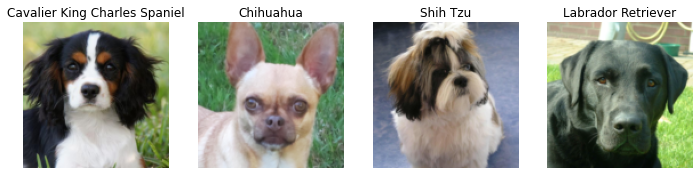

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

## Augmenting the Data
You can augment the pictures to see which one is more suitable, but more importantly you can understand which one will be best for the model

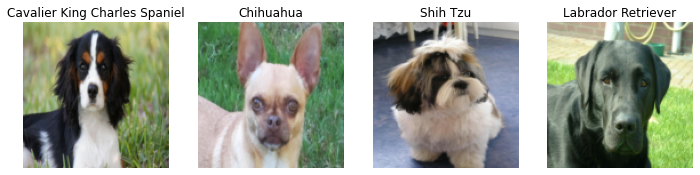

In [18]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

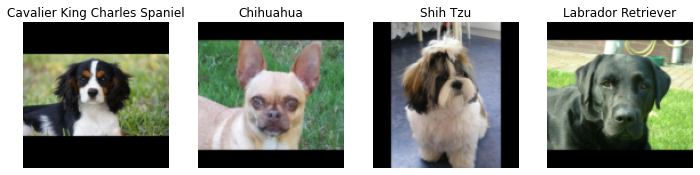

In [19]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

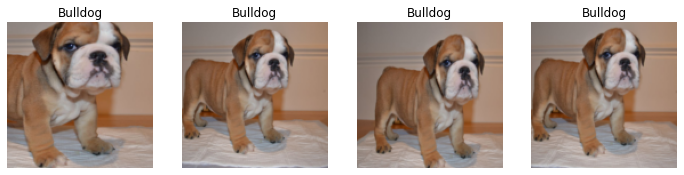

In [20]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### You can even Augment the data in batches to transform them differently

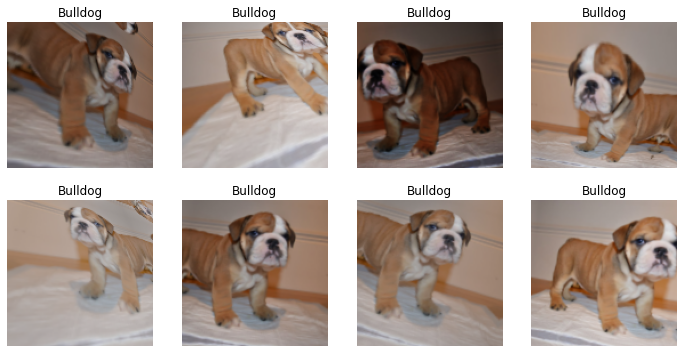

In [21]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

# Training the Model

Using Resnet34: You can see that the model was able to receive an error rate of around 7% after just 5 epochs ran!

*Tip: Using Pretrained models are super helpful and will yeild quality results have they been tested vigously prior so their construction is sound.

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.994775,0.359848,0.117766,02:14


epoch,train_loss,valid_loss,error_rate,time
0,0.545313,0.308808,0.085279,02:16
1,0.478797,0.349683,0.098477,02:16
2,0.362072,0.307271,0.090355,02:13
3,0.257933,0.261692,0.075127,02:11
4,0.193289,0.260584,0.071066,02:12


# Confusion Matrix
To see visually what happened in the model and where the mistakes happened. As you can see, not many problems along this data set with the top errors belonging to the combination of Maltese & Havanese.

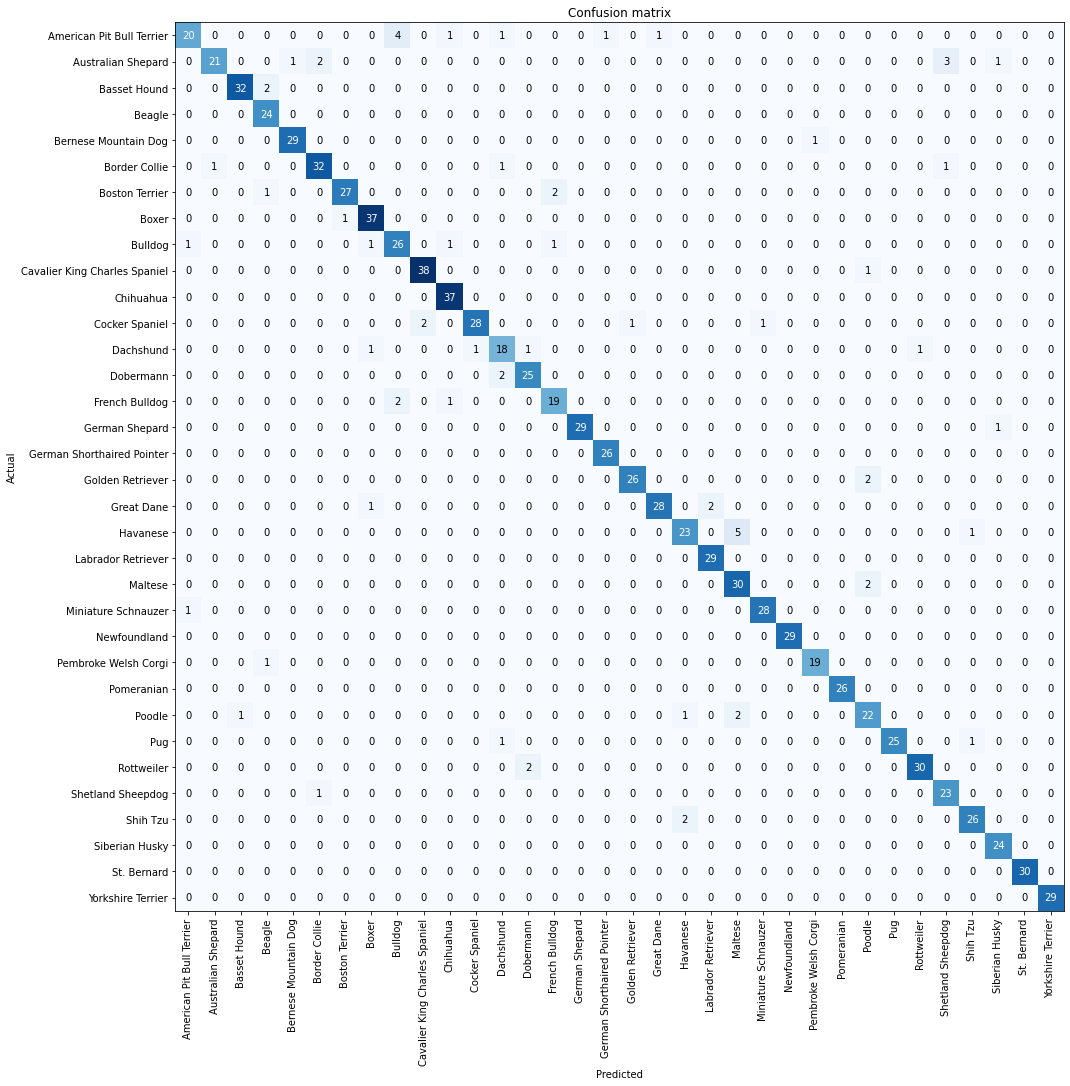

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))

## Plot that shows top losses 

Most likely is because bing double classified the pictures or as shown below some of bings images showed more than one dog. So we will jsust delete them.

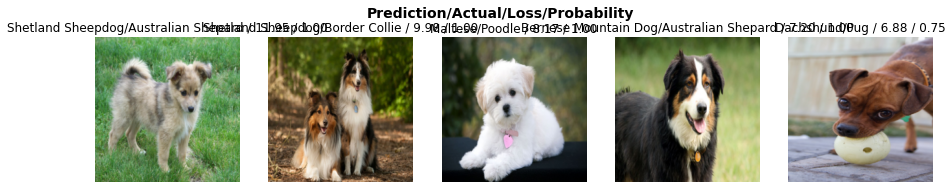

In [25]:
interp.plot_top_losses(5, nrows=1)

## Cleaning the Data before launching App 

Here You can manually assist the model by deleting pictures that are not dogs or changing the wrongly classified ones.

In [31]:
cleaner = ImageClassifierCleaner(learn)
cleaner

# Exporting data to app

Time to build Puppy Palooza!

In [26]:
learn.export()

## Creating a package zip for the app to work

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

## Predicting on First Image and Showing Vocab

In [29]:

learn_inf.predict('images/dog.jpg')

('Golden Retriever',
 tensor(17),
 tensor([1.2688e-04, 5.8264e-05, 6.8264e-06, 3.6190e-04, 1.2516e-04, 2.2682e-04, 1.3197e-06, 6.1833e-06, 8.3507e-05, 4.9703e-06, 4.9109e-06, 1.1462e-05, 4.5724e-05, 9.5595e-07, 4.4707e-05, 1.0991e-04,
         6.8573e-06, 7.2455e-01, 1.2842e-04, 7.1982e-04, 2.7264e-01, 1.7430e-05, 8.6858e-06, 4.6679e-05, 1.1011e-04, 1.7436e-05, 9.0701e-06, 3.7414e-05, 4.8176e-05, 2.1658e-04, 1.7122e-05, 5.2705e-05,
         1.0824e-04, 4.3512e-05]))

In [30]:
learn_inf.dls.vocab

(#34) ['American Pit Bull Terrier','Australian Shepard','Basset Hound','Beagle','Bernese Mountain Dog','Border Collie','Boston Terrier','Boxer','Bulldog','Cavalier King Charles Spaniel'...]

# Go check out my app here: https://github.com/andrewdarmond/PuppyPalooza